## Random Numbers and Games

Chapter 8 of the following book explores Random Numbers and Games.

* [L] *A Primer on Scientific Programming with Python* by Hans Petter Langtangen, 2nd edition.

We will go through some of the examples covered in this Chapter. This is not meant to be as comprehensive as that chapter.

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv

We will make use of two Python modules for random numbers. 

First there is Numpy's `random` sampling submodule. The features of this submodule are described in the [Numpy documentation](https://numpy.org/doc/stable/reference/random/index.html). We can import this module with:

In [2]:
from numpy import random

This import allows us to write `random.function` where we would have previously written `np.random.function`. (We are following the imports used by **L**.)

Second there is the `random` module in the standard Python library. This module is documented in the [Python library documentation](https://docs.python.org/3/library/random.html). We import it below with the name `random_number` following **L** to avoid the name conflict with the numpy submodule.

In [3]:
import random as random_number

## Simulating coin flips

The possibility of a coin flip is "heads" or "tails". We can simulate this with the `random_number.choice` function which chooses a random element of a sequence (list or tuple).

In [4]:
coin_possibilities = ("Heads", "Tails")

In [5]:
for i in range(10):
    result = random_number.choice(coin_possibilities)
    print("Flipping a coin resulted in {}.".format(result))

Flipping a coin resulted in Tails.
Flipping a coin resulted in Heads.
Flipping a coin resulted in Tails.
Flipping a coin resulted in Tails.
Flipping a coin resulted in Tails.
Flipping a coin resulted in Heads.
Flipping a coin resulted in Tails.
Flipping a coin resulted in Heads.
Flipping a coin resulted in Heads.
Flipping a coin resulted in Tails.


## Simulating dice

We can get a random integer chosen uniformly in the interval $[a,b)$ with the command 
```python
random.randint(a, b)
```
Note that `b` is excluded from the possibilites. We can use this for example to simulate the roll of a dice.

**Problem**

We want to write a class representing the dice rolls in Monopoly, where two dice are used. We'd like the class to keep track of the number of times each sum of the two dice is attained. We'd also like the class to keep track of the number of times doubles was rolled (i.e., when both dice have the same value).

Write a class `DicePair` which has several methods:
* `roll()` which returns a pair of integers in $[1,6]$ (chosen uniformly)
* `roll_count(n)` which returns the number of times the dice roll has summed to `n`.
* `doubles_count()` which returns the number of times the dice has rolled doubles.

**Discussion**

We can roll a single dice with the following command:

In [6]:
random.randint(1, 7)

3

To roll two dice we can do:

In [7]:
d1 = random.randint(1, 7)
d2 = random.randint(1, 7)
(d1, d2)

(1, 2)

Once `d1` and `d2` are computed we can compute the total and decide if doubles were rolled as below.

In [8]:
total = d1 + d2
doubles = d1 == d2
(total, doubles)

(3, False)

Because our class needs to keep track of the number of times `total` is rolled and the number of `doubles` we need a way to do this. 

We can just use an integer `doubles_counter` to keep track of the number of times doubles is rolled.

We'll keep track of the number of times each total is rolled using a dictionary `roll_counts`. This dictionary will map `total` to the the number of times that total was rolled. So that we don't have to initialize all the zeros, we'll assume if `total` is not a key in the dictionary then that number has not been rolled.

In [9]:
class DicePair:
    
    def __init__(self):
        # Initialize the variables for statistics tracking
        
        # doubles_counter will start at zero.
        self._doubles_counter = 0

        # roll_counts begins as an empty dictionary.
        self._roll_counts = {} 

    def roll(self):
        """
        Return a pair of integers representing a pair of dice rolls.
        """
        d1 = random.randint(1, 7)
        d2 = random.randint(1, 7)
        
        # Keep track of the number of doubles
        if d1 == d2:
            self._doubles_counter += 1
        
        total = d1 + d2
        # Update the number of times total was rolled.
        if total in self._roll_counts:
            self._roll_counts[total] += 1
        else:
            # This is the first time we rolled total
            self._roll_counts[total] = 1
        
        return (d1, d2)

    def roll_count(self, n):
        if n in self._roll_counts:
            return self._roll_counts[n]
        else:
            # n has not been rolled yet!
            return 0
    
    def doubles_count(self):
        return self._doubles_counter

To test our class, lets roll the dice a bunch of times and see if the statistics make sense.

In [10]:
num_rolls = 10**5
dp = DicePair()
for i in range(num_rolls):
    dp.roll()

We should roll doubles $1/6$ of the time.

In [11]:
expected_doubles = num_rolls/6
print("We expect {} doubles.".format( expected_doubles ))
print("We rolled doubles {} times.".format( dp.doubles_count() ))

We expect 16666.666666666668 doubles.
We rolled doubles 16582 times.


Outcomes of rolling two dice can be any integer in $[2,12]$. The probability of rolling `t` is 
$$\frac{6 - |t-7|}{36}.$$
(See [this figure](https://en.wikipedia.org/wiki/Probability#/media/File:Dice_Probability.png) for an explaination.)

In [12]:
for total in range(2,13):
    expected = (6 - abs(total - 7)) * num_rolls / 36
    print("The expected number of times {} is rolled is {:0.1f} ".format(total, expected) +
          " and we rolled it {} times.".format( dp.roll_count(total) ))

The expected number of times 2 is rolled is 2777.8  and we rolled it 2833 times.
The expected number of times 3 is rolled is 5555.6  and we rolled it 5448 times.
The expected number of times 4 is rolled is 8333.3  and we rolled it 8190 times.
The expected number of times 5 is rolled is 11111.1  and we rolled it 11208 times.
The expected number of times 6 is rolled is 13888.9  and we rolled it 13968 times.
The expected number of times 7 is rolled is 16666.7  and we rolled it 16685 times.
The expected number of times 8 is rolled is 13888.9  and we rolled it 14054 times.
The expected number of times 9 is rolled is 11111.1  and we rolled it 11164 times.
The expected number of times 10 is rolled is 8333.3  and we rolled it 8180 times.
The expected number of times 11 is rolled is 5555.6  and we rolled it 5515 times.
The expected number of times 12 is rolled is 2777.8  and we rolled it 2755 times.


Outcomes of rolling two dice can be any integer in $[2,12]$. We can plot the dice rolls as a histogram using `matplotlib`. I referred to the [`matplotlib` documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) when drawing this. We expect to see a nice 

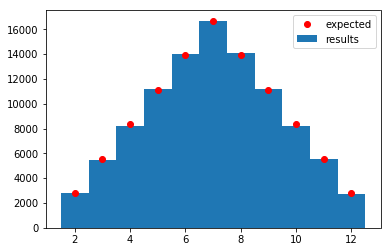

In [13]:
bins = np.arange(1.5,13.5,1)
weights=np.array([dp.roll_count(t) for t in range(2,13)])
plt.hist(bins[:-1], bins = bins, weights=weights, label="results")

total = np.arange(2,13,1)
plt.plot(total, (6 - abs(total - 7)) * num_rolls / 36, "or", label = "expected")
plt.legend()
plt.show()

In [14]:
(6 - abs(total - 7)) * num_rolls / 36

array([ 2777.77777778,  5555.55555556,  8333.33333333, 11111.11111111,
       13888.88888889, 16666.66666667, 13888.88888889, 11111.11111111,
        8333.33333333,  5555.55555556,  2777.77777778])

In [15]:
len(weights)

11

In [16]:
len([dp.roll_count(t) for t in range(2,13)])

11

In [17]:
len(np.arange(1.5,12.5,1))

11

In [18]:
np.arange(1.5,13.5,1)

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5])

## Shuffling cards

It is natural to represent a deck of cards as a list. For example a deck of $20$ cards with cards numbered $1$ to $20$ might be represented as:

In [19]:
deck = list(range(1,21))
deck

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

Both `numpy` and the `random` module have `shuffle` methods for randomly reordering a list. We can do either of the below:

In [20]:
random_number.shuffle(deck)
deck

[10, 15, 6, 19, 1, 4, 7, 17, 3, 2, 16, 8, 20, 9, 11, 5, 18, 14, 13, 12]

In [21]:
random.shuffle(deck)
deck

[2, 12, 3, 13, 19, 11, 4, 5, 8, 1, 9, 15, 6, 18, 17, 16, 7, 10, 20, 14]

## Drawing a random element

We can select a random elemnt of a list `lst` using the command
```python
random_number.choice(lst)
```
For example if a hat has $3$ red marbles, $2$ blue, and $4$ purple, then we can simulate the choice of a random marble using the following:

In [22]:
hat = 3 * ["red"] + 2 * ["blue"] + 4 * ["purple"]
hat

['red', 'red', 'red', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple']

In [23]:
random_number.choice(hat)

'red'

The choice is returned to the list as can be seen below:

In [24]:
hat

['red', 'red', 'red', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple']

If we want to actually remove something from the hat, it might be a better choice to select a random index. Then we can use the [`pop` method](https://docs.python.org/3/tutorial/datastructures.html) to make and remove our choice.

In [25]:
index = random.randint(len(hat))
marble = hat.pop(index)
print("We pulled {} out of the hat.".format(marble))
hat

We pulled red out of the hat.


['red', 'red', 'blue', 'blue', 'purple', 'purple', 'purple', 'purple']

**Remark** I just noticed an annoying difference between Numpy's `randint` and the Random modules `randint`. Numpy excludes the right endpoint and the Random module includes it!

An issue with this method is that it requires making a large list. Numpy's `choice` function allows us to put probabilisitic weights on the elements of a list using a named parameter `p` containing the list of probabilities. So, the following code has the same probabilities for the result as the above `choice` function.

In [26]:
random.choice(["red", "blue", "purple"], p=[3/9, 2/9, 4/9])

'purple'